In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [7]:
# 加载数据
data = pd.read_csv("ProcessedData/Medals.csv")  # 替换为实际数据文件路径
data = data[['NOC','Total','Year']]
# 按 NOC 分组并将 Total 列求和
data_grouped = data.groupby('NOC', as_index=False)['Total'].sum()
data_grouped


,NOC,Total
0,AFG,2
1,AHO,1
2,ALB,2
3,ALG,20
4,ANZ,12
...,...,...
147,VEN,19
148,VIE,5
149,YUG,90
150,ZAM,3


C:\Users\ZS\anaconda3\envs\2025MCM\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


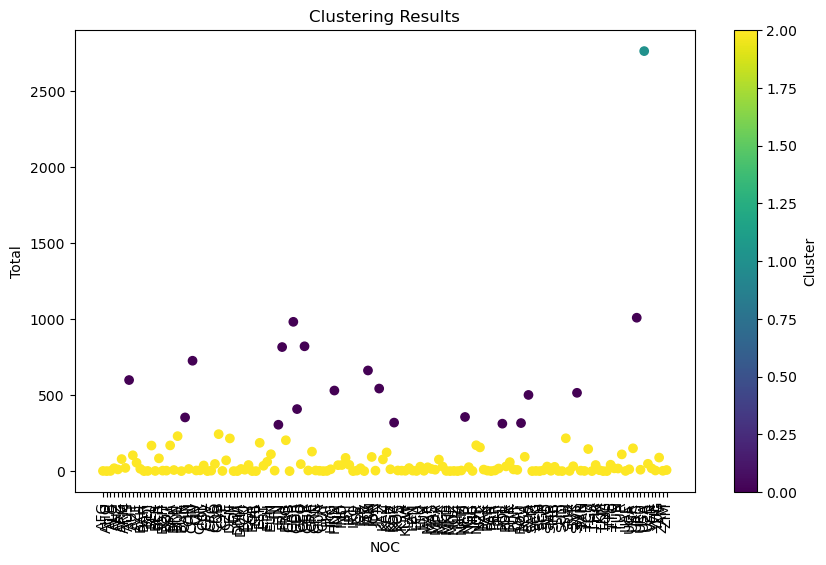

Cluster 0 的前 5 个 NOC:
   NOC  Total
0  AUS    600
1  CAN    354
2  CHN    727
3  FIN    306
4  FRA    817
------------------------------
Cluster 1 的前 5 个 NOC:
   NOC  Total
5  USA   2764
------------------------------
Cluster 2 的前 5 个 NOC:
    NOC  Total
6   AFG      2
7   AHO      1
8   ALB      2
9   ALG     20
10  ANZ     12
------------------------------
聚类结果已保存到 clustered_data.csv


C:\Users\ZS\AppData\Local\Temp\ipykernel_29460\368199351.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.head(5))


In [12]:
# 假设 data_grouped 是按 NOC 分组后的数据
# 示例数据，可以替换为实际数据
data_grouped = data.groupby('NOC', as_index=False)['Total'].sum()

# 数据标准化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_grouped[['Total']])

# 使用 K-means 进行聚类
n_clusters = 3  # 设置聚类簇数
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data_grouped['Cluster'] = kmeans.fit_predict(scaled_data)

# 聚类结果可视化
plt.figure(figsize=(10, 6))
plt.scatter(data_grouped['NOC'], data_grouped['Total'], c=data_grouped['Cluster'], cmap='viridis')
plt.xlabel('NOC')
plt.ylabel('Total')
plt.title('Clustering Results')
plt.colorbar(label='Cluster')
plt.xticks(rotation=90)  # 如果 NOC 数较多，可以旋转以便查看
plt.show()

# 按 Cluster 分组，取每个组的前 5 个 NOC
top_nocs_per_cluster = (
    data_grouped.groupby('Cluster', group_keys=False)
    .apply(lambda group: group.head(5))
    .reset_index(drop=True)  # 重置索引，移除分组信息
)

# 打印每个聚类簇前 5 个 NOC
for cluster_id in top_nocs_per_cluster['Cluster'].unique():
    cluster_data = top_nocs_per_cluster[top_nocs_per_cluster['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id} 的前 5 个 NOC:")
    print(cluster_data[['NOC', 'Total']])
    print("-" * 30)
# 可选：将结果保存到 CSV 文件
data_grouped.to_csv('clustered_data.csv', index=False)
print("聚类结果已保存到 clustered_data.csv")


In [15]:
# 获取第一类（Cluster 0）和第二类（Cluster 1）的数据
cluster_0_data = data_grouped[data_grouped['Cluster'] == 0]
cluster_1_data = data_grouped[data_grouped['Cluster'] == 1]

# 输出 Cluster 0 的所有 NOC 和 NOC 的数量
print("Cluster 0 的所有 NOC:")
print(cluster_0_data[['NOC', 'Total']])
print(f"Cluster 0 中 NOC 的总数量: {len(cluster_0_data)}")
print("-" * 30)

# 输出 Cluster 1 的所有 NOC 和 NOC 的数量
print("Cluster 1 的所有 NOC:")
print(cluster_1_data[['NOC', 'Total']])
print(f"Cluster 1 中 NOC 的总数量: {len(cluster_1_data)}")
print("-" * 30)


Cluster 0 的所有 NOC:
     NOC  Total
7    AUS    600
22   CAN    354
24   CHN    727
47   FIN    306
48   FRA    817
51   GBR    983
52   GDR    409
54   GER    822
62   HUN    531
71   ITA    663
74   JPN    544
78   KOR    320
97   NED    357
107  POL    313
112  ROU    317
114  RUS    502
127  SWE    516
143  URS   1010
Cluster 0 中 NOC 的总数量: 18
------------------------------
Cluster 1 的所有 NOC:
     NOC  Total
145  USA   2764
Cluster 1 中 NOC 的总数量: 1
------------------------------


In [ ]:
# 选择特征
features = data[['Gold', 'Silver', 'Bronze', 'Total']]  # 替换为实际列名

# 数据标准化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 确定聚类数量
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# 绘制肘部法则图
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# 训练模型
optimal_k = 2  # 根据肘部法则图选择最佳k值
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# 标签分析
data['Tag'] = data['Cluster'].apply(lambda x: 1 if x == 0 else 0)  # 根据需求设置逻辑

# 保存结果
data.to_csv("clustered_data.csv", index=False)